## Importación de librerias

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Lectura del dataset

In [46]:
df_ = pd.read_csv('netflix_titles.csv')

In [47]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [48]:
df_["date_added"] = pd.to_datetime(df_['date_added'])

In [49]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [50]:
#Revisión de dataset
df_.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
df_.describe(include='object')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


## Back up

In [52]:
#Backup de los datos
df=df_.copy()

## Data Cleaning

In [53]:
#revisando dimensiones y variables del set de datos
print('shape:', df.shape)
print('columns:' ,df.columns)

shape: (8807, 12)
columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Verificando valores perdidos y realizando la imputación

In [10]:
# #Show Id como Indice
# df.set_index("show_id", inplace=True)

<Figure size 720x432 with 0 Axes>

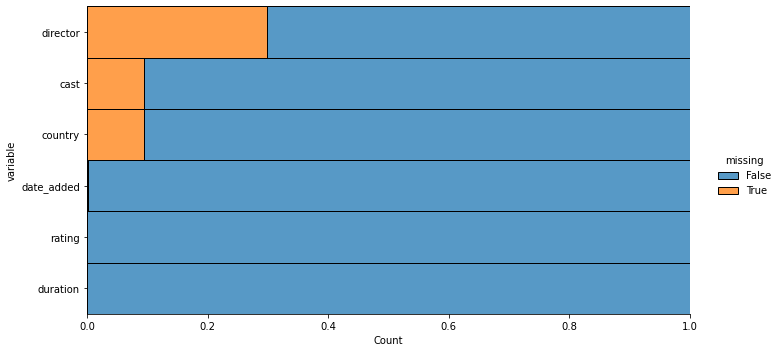

Porcentaje de missing:
 director      29.91
cast           9.37
country        9.44
date_added     0.11
rating         0.05
duration       0.03
dtype: float64


In [54]:
#Grafica de valores nulos
Summary_nulos=(df.isna().sum()/len(df))*100
vars_nulls=list(Summary_nulos[Summary_nulos>0].index)
plt.figure(figsize=(10,6))
sns.displot(
    data=df_[vars_nulls].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2,
    palette = "tab10"
)
plt.show()
print('Porcentaje de missing:\n', round(Summary_nulos[Summary_nulos>0],2))

Para los valores con menos de 1% de nulos se eliminará 

In [55]:
df = df[df['date_added'].notna()]
df = df[df['rating'].notna()]
df = df[df['duration'].notna()]

Para los mayores que 1% se imputará por Na

In [56]:
df["director"]= df["director"].fillna("NaN")
df["cast"]= df["cast"].fillna("NaN")
df["country"]= df["country"].fillna("NaN")

Se realiza el features de fecha para un mejor analisis

In [57]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [58]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int64         
 13  month_added   8790 non-null   int64         
 14  season_count  8790 non-null   object        
dtypes: datetime64[ns](1), int64(3), object

## Normalización

Para la normalizacion se requiere creacion de tablas de dimensiones y tabla de eventos

In [60]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2


### Creando la tabla dimensional de type

In [61]:
unique_values = df['type'].unique()
table_type = pd.DataFrame({'type': unique_values}).reset_index()
table_type.columns = ['id', 'type']

### Creando tabla dimensional de director

In [62]:
unique_values = df['director'].unique()
table_director = pd.DataFrame({'director': unique_values}).reset_index()
table_director.columns = ['id', 'director']

### Creando tabla dimensional de listed_in

In [63]:
unique_values = df['listed_in'].unique()
table_listed_in = pd.DataFrame({'listed_in': unique_values}).reset_index()
table_listed_in.columns = ['id', 'listed_in']

### Creando tabla dimensional de rating

In [64]:
unique_values = df['rating'].unique()
table_rating = pd.DataFrame({'rating': unique_values}).reset_index()
table_rating.columns = ['id', 'rating']

In [65]:
mapping = {'TV Show': 1, 'Movie': 0}
df['id_type'] = df['type'].map(mapping)

df['id_director'] = df['director'].map(
    table_director.set_index('director')['id']
)

df['id_listed'] = df['listed_in'].map(
    table_listed_in.set_index('listed_in')['id']
)

df['id_rating'] = df['rating'].map(
    table_rating.set_index('rating')['id']
)

In [66]:
print('columns:' ,df.columns)

columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_count', 'id_type', 'id_director',
       'id_listed', 'id_rating'],
      dtype='object')


In [111]:
columnas_seleccionadas = ['show_id','title', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description','year_added', 'month_added', 'season_count', 'id_type', 'id_director',
       'id_listed', 'id_rating']
table_dim = df[columnas_seleccionadas]

table_dim.head(4)

,show_id,title,cast,country,date_added,release_year,duration,description,year_added,month_added,season_count,id_type,id_director,id_listed,id_rating
0,s1,Dick Johnson Is Dead,NaN,United States,2021-09-25,2020,90,"As her father nears the end of his life, filmm...",2021,9,,0,0,0,0
1,s2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,,"After crossing paths at a party, a Cape Town t...",2021,9,2,1,1,1,1
2,s3,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,,To protect his family from a powerful drug lor...,2021,9,1,1,2,2,1
3,s4,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,,"Feuds, flirtations and toilet talk go down amo...",2021,9,1,1,1,3,1


# Exportando database to SQL server

In [112]:
pip install pandas pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


## Conexión a la base de datos

Creación de base de datos

In [73]:
import pyodbc

# Configurar la conexión al servidor SQL Server
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Master'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)

# Nombre de la nueva base de datos
new_database_name = 'Netflix_and_TV_show'

# Crear la nueva base de datos
create_database_query = f"CREATE DATABASE {new_database_name};"
cursor = conn.cursor()
cursor.execute(create_database_query)
conn.commit()
cursor.close()

In [76]:
print('columns:' ,table_dim.columns)
print('columns:' ,table_director.columns)
print('columns:' ,table_listed_in.columns)
print('columns:' ,table_type.columns)
print('columns:' ,table_rating.columns)

columns: Index(['show_id', 'title', 'cast', 'country', 'date_added', 'release_year',
       'duration', 'description', 'year_added', 'month_added', 'season_count',
       'id_type', 'id_director', 'id_listed', 'id_rating'],
      dtype='object')
columns: Index(['id', 'director'], dtype='object')
columns: Index(['id', 'listed_in'], dtype='object')
columns: Index(['id', 'type'], dtype='object')
columns: Index(['id', 'rating'], dtype='object')


Creando tabla de type

In [123]:
# Configurar la conexión a la base de datos
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Netflix_and_TV_show'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
# Crear tabla table_type
create_table_type_query = """
CREATE TABLE table_type (
    id VARCHAR(50) PRIMARY KEY,
    type VARCHAR(255) NOT NULL
);
"""
cursor.execute(create_table_type_query)
conn.commit()

table_type.to_sql('table_type', conn, index=False, if_exists='replace')

ProgrammingError: ('42S01', "[42S01] [Microsoft][ODBC SQL Server Driver][SQL Server]There is already an object named 'table_type' in the database. (2714) (SQLExecDirectW)")

Creando tabla de directores

In [124]:
# Configurar la conexión a la base de datos
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Netflix_and_TV_show'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
# Crear tabla table_director
create_table_director_query = """
CREATE TABLE table_director (
    id VARCHAR(50) PRIMARY KEY,
    director VARCHAR(255) NOT NULL
);
"""
cursor.execute(create_table_director_query)
conn.commit()

Creando tabla listed_in

In [126]:
# Configurar la conexión a la base de datos
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Netflix_and_TV_show'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
# Crear tabla table_listed_in
create_table_listed_in_query = """
CREATE TABLE table_listed_in (
    id VARCHAR(50) PRIMARY KEY,
    listed_in VARCHAR(255) NOT NULL
);
"""
cursor.execute(create_table_listed_in_query)
conn.commit()

Creando tabla rating

In [127]:
# Configurar la conexión a la base de datos
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Netflix_and_TV_show'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
# Crear tabla table_listed_in
create_table_rating_query = """
CREATE TABLE table_rating (
    id VARCHAR(50) PRIMARY KEY,
    rating VARCHAR(255) NOT NULL
);
"""
cursor.execute(create_table_rating_query)
conn.commit()

In [128]:
# Establecer la conexión con la base de datos
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Netflix_and_TV_show'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Crear tu consulta SQL para crear la tabla
create_table_dim_query = """
CREATE TABLE table_dim (
    show_id VARCHAR(50),
    title VARCHAR(255),
    cast VARCHAR(max),
    country VARCHAR(255),
    date_added datetime,
    release_year INT,
    duration VARCHAR(20),
    description VARCHAR(max),
    year_added INT,
    month_added INT,
    season_count VARCHAR(max),
    id_type INT,
    id_director INT,
    id_listed INT,
    id_rating INT,
    PRIMARY KEY(show_id)

);
"""

# Ejecutar la consulta para crear la tabla
cursor.execute(create_table_dim_query)
conn.commit()

# Cerrar la conexión
conn.close()

Insertando los dataset normalizados a la base de datos

In [129]:
table_dim.to_sql('table_dim', con=engine, index=False, if_exists='replace')
table_type.to_sql('table_type', con=engine, index=False, if_exists='replace')
table_director.to_sql('table_director', con=engine, index=False, if_exists='replace')
table_listed_in.to_sql('table_listed_in', con=engine, index=False, if_exists='replace')
table_rating.to_sql('table_rating', con=engine, index=False, if_exists='replace')

-1

Creando la vista para la exportación a Power BI y Excel

In [ ]:
# Definir la cadena de conexión
server = 'ANDRES\SQLEXPRESS' #Colorcar el nombre del servidor en donde se encuentra instalado SQL Server
database = 'Netflix_and_TV_show'
username = 'sa'
password = 'vicente'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Definir el script SQL para crear la vista
create_view_query = """
CREATE VIEW dbo.Reporting
AS
SELECT
    table_dim.show_id,
    table_dim.title,
    table_dim.cast,
    table_dim.country,
    table_dim.date_added,
    table_dim.release_year,
    table_dim.duration,
    table_dim.description,
    table_dim.year_added,
    table_dim.month_added,
    table_dim.season_count,
    table_dim.id_type AS dim_id_type,
    table_dim.id_director AS dim_id_director,
    table_dim.id_listed AS dim_id_listed,
    table_dim.id_rating AS dim_id_rating,
    table_director.id AS director_id,
    table_director.director,
    table_listed_in.id AS listed_in_id,
    table_listed_in.listed_in,
    table_rating.id AS rating_id,
    table_rating.rating,
    table_type.id AS type_id,
    table_type.type
FROM
    table_dim
LEFT JOIN
    table_director ON table_dim.id_director = table_director.id
LEFT JOIN
    table_listed_in ON table_dim.id_listed = table_listed_in.id
LEFT JOIN 
    table_rating ON table_dim.id_rating = table_rating.id
LEFT JOIN
    table_type ON table_dim.id_type = table_type.id;
"""

# Ejecutar el script SQL
cursor.execute(create_view_query)
conn.commit()

# Cerrar la conexión
conn.close()